In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import linear_model, metrics

In [6]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" ).flatten()
    return data

In [15]:
import pandas as pd
#PATH ="C:\Users\saminens\Documents\miscelleneous\Train\Images\train\\"
PATH = "/Users/saminens/Documents/miscelleneous/Train/Images/train/"
input_table = pd.read_csv("C:/Users/saminens/Documents/miscelleneous/Train/train.csv")
input_table['filename'] = PATH+input_table['filename']
X_train, X_valid,y_train,y_valid = train_test_split(input_table['filename'],input_table['label'],test_size = 0.25)

In [16]:
X_train_final = np.array([load_image(f) for f in X_train])
X_valid_final = np.array([load_image(f) for f in X_valid])

In [17]:
X_train_final.shape

(36750, 3136)

In [18]:
mean = X_train_final.mean()
stddev = X_train_final.std()
mean

88.808550577884219

In [19]:
X_train_norm = (X_train_final-mean)/stddev
X_valid_norm = (X_valid_final-mean)/stddev

In [20]:
lm = linear_model.LogisticRegression(C=0.001, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=True)

In [21]:
lm.fit(X_train_norm,y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=True)

In [22]:
pred = lm.predict(X_train_norm)
(pred == y_train).sum()/len(pred)

0.91012244897959182

In [23]:
pred = lm.predict(X_valid_norm)
(pred == y_valid).sum()/len(pred)

0.90587755102040812

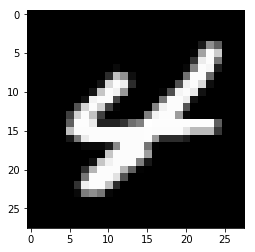

In [25]:

img=mpimg.imread('C:/Users/saminens/Documents/miscelleneous/Train/Images/train/0.png')
imgplot = plt.imshow(img)
plt.show()